In [584]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="https://cdn-b.william-reed.com/var/wrbm_gb_hospitality/storage/images/publications/hospitality/bighospitality.co.uk/suppliers/adia/2867353-2-eng-GB/Adia_news_large.png")

### 1. Within Adia, clients are rating workers, and workers are rating clients (1-5 stars each). Specifi to Adia, what kind of insights can you derive from that? Do you believe that a 1-5 star rating is a good way to collect feedback or would you recommend a different feedback mechanism from a data insights perspective?

1-5 scale seems to be the best choice. It's simple to translate to the natural language and offers the neutral point in the middle that is easy to detect. It just goes from:

1.    Very Low

2.    Somewhat Low

3.    Neutral

4.    Somewhat positive

5.    Very positive

There various other rating scales like 1-10, like/dislike but according to various research, 1-5 seems to outperform them. 1-10 is a bit confusing like hard to distingue between 6-7, 3-4. Where is like/dislike doesn’t give much options to reviewers.
According to data perspective, The more data the better. I would recommend a full feedback page. In which we give both the side a chance to write a review. A section where a worker can express their interview process, how they felt about it. Can give pros and cons. This will not just help us to better understand the data or find insights but also help new worker and employee to know a bit better about each other.
###### Example shown below is Glassdoor review page took from Google photos 

In [665]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="https://d2shvezvv4hf5p.cloudfront.net/wp-content/uploads/2016/06/22104934/Glassdoor-Google-Overview-2.jpg")


## 2. Using the attached spreadsheet, please take a look and see what insights you can glean from the given data without knowing what precisely it is targeting. If you give the candidate onboarding experience a try, the steps and substeps will make more sense!



## Exploratory data analysis for ADIA
### Structure of EDA
1) Goals and Objective: Understanding the data to find some valuable insights which could be used to take calculative strategic decisions!

2) Basic Steps: Importing the CSV file to conduct the Data Analysis and importing some basic library to assist or to make the analysis process easy.

3) Brief Overview of Data: Exploring the data, knowing about its distributions: how data and records are divided among different values or category to get a better understanding of the data. Maybe find out some pattern.

#### (If basic analysis, facts, and figure, distribution of data are not which interests you, please skip all the steps and jump to the 4th step for the insights.)

4) Insights

5) Conclusion

### 2) Basic Steps


In [2]:
# importing libraries to support the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [30]:
# imporing the dataset and displaying few rows
path = 'C:/Users/mohit/Downloads/trydata.csv'
df = pd.read_csv(path, encoding="cp1252")
df.head()

,CANDIDATEID,STATE,CITY,USER VERIFICATION STATUS,VERIFIED DATE,CANDIDATE ACCOUNT STATUS,REGISTERED DATE,LAST MODIFIED DATE,Step Sequence,TAG NAME,STEP NAME,Candidate Sub Step Helper,Time in Sub Step,Time in Main Step,WORKFLOW STEP STATUS,STEP CREATED DATE,Time to Verification,Sub Step Latency Bucket,Main Step Latency Bucket
14563,171,New York,Kings County,Verification_Pending,2018-06-06 20:07:53.9572788 +00:00,Active,2018-02-09 22:01:11,2018-06-06 20:07:54,NaN,Upload CV,Document Upload,171Document UploadVerification Pending,2205:25:25,FALSE,Verification Pending,2018-05-30 02:23:54,#REF!,>1 mo,<1 dy
14564,171,New York,Kings County,Verification_Pending,2018-06-06 20:07:53.9572788 +00:00,Active,2018-02-09 22:01:11,2018-06-06 20:07:54,2.0,I9 Verification,I9 Section 1,171I9 Section 1In Progress,17:26:20,5812:32:01,In Progress,2018-05-30 19:50:13,#REF!,6 hr - 1 dy,>1 mo
14565,170,New York,Rosedale,Verification_Pending,2018-06-06 20:05:56.6354188 +00:00,Inactive,2018-02-09 14:19:26,2018-06-06 20:05:57,4.0,Interview,Interview,170InterviewNot Scheduled,422:39:02,FALSE,Not Scheduled,2018-02-27 04:58:28,#REF!,2 wk - 1 mo,<1 dy
14566,170,New York,Rosedale,Verification_Pending,2018-06-06 20:05:56.6354188 +00:00,Inactive,2018-02-09 14:19:26,2018-06-06 20:05:57,1.0,Adia Agreement,Adia Agreement - Contract (Worker Agreement),170Adia Agreement - Contract (Worker Agreement...,422:39:02,422:39:02,Clear,2018-02-27 04:58:28,#REF!,2 wk - 1 mo,2 wk - 1 mo
14567,170,New York,Rosedale,Verification_Pending,2018-06-06 20:05:56.6354188 +00:00,Inactive,2018-02-09 14:19:26,2018-06-06 20:05:57,1.0,Adia Agreement,Adia Agreement - E Signature,170Adia Agreement - E SignatureClear,0:00:00,422:39:02,Clear,2018-02-27 04:58:28,#REF!,< 5 min,2 wk - 1 mo


### 3) Brief Overview of Data¶

Check which columns have missing values in it


In [592]:
df.isna().sum()

CANDIDATEID                     0
STATE                          28
CITY                            0
USER VERIFICATION STATUS        0
VERIFIED DATE                1307
CANDIDATE ACCOUNT STATUS        0
REGISTERED DATE                 0
LAST MODIFIED DATE              0
Step Sequence                   0
TAG NAME                        0
STEP NAME                     217
Candidate Sub Step Helper       0
Time in Sub Step                0
Time in Main Step               0
WORKFLOW STEP STATUS            0
STEP CREATED DATE             217
Sub Step Latency Bucket         0
Main Step Latency Bucket        0
dtype: int64

Understanding the data like what are the unique categories in each feature is and how values are distributed among them!

In [610]:
#df['Candidate Sub Step Helper'] = df['Candidate Sub Step Helper'].fillna('None')
#df['Candidate Sub Step Helper'] = df['Candidate Sub Step Helper'].str.replace('\d+', '')
#df['Step Sequence'] = df['Step Sequence'].fillna('None')
#df['TAG NAME'] = df['TAG NAME'].fillna('None')
cols = ['Main Step Latency Bucket', 'Sub Step Latency Bucket','WORKFLOW STEP STATUS','Candidate Sub Step Helper',
'TAG NAME','Step Sequence','CANDIDATE ACCOUNT STATUS','USER VERIFICATION STATUS']
for col in cols:
    print(col)
    print(df[col].value_counts(),'\n')

Main Step Latency Bucket
<1 dy          8396
>1 mo          4180
3 dy - 1 wk     613
1 - 2 wk        473
>1 dy           420
2 wk - 1 mo     378
#VALUE!          93
#REF!            15
Name: Main Step Latency Bucket, dtype: int64 

Sub Step Latency Bucket
< 5 min        12070
>1 mo            917
2 wk - 1 mo      291
< 30 min         290
6 hr - 1 dy      285
3 dy - 1 wk      214
1 - 2 wk         190
1 - 3 dy         114
< 6 hr           108
< 1 hr            88
#REF!              1
Name: Sub Step Latency Bucket, dtype: int64 

WORKFLOW STEP STATUS
Clear                   10179
In Progress              1970
Not Scheduled            1200
Interview Passed          406
Verification Pending      265
Unknown Status            217
Scheduled                 169
Not Started               126
Failed                     17
No Show                    16
Interview Failed            3
Name: WORKFLOW STEP STATUS, dtype: int64 

Candidate Sub Step Helper
Adia Agreement - E SignatureClear              

### One basic table for understanding Sequence, Tags and Subsequence

Here we can see clearly that that at step 0 there is all None values, and all values are missing and there is no step sequence for uploading the CV and that doesn't come under any other category. We can use the domain knowledge to do the root cause analysis and find the reason behind the abnormality and take corrective measures to rectify the problem for future data mining process.


In [611]:
df.groupby(['Step Sequence','TAG NAME','Candidate Sub Step Helper' ]).size()

Step Sequence  TAG NAME               Candidate Sub Step Helper                        
0.0            None                   NULLUnknown Status                                    217
1.0            Adia Agreement         Adia Agreement - Contract (Worker Agreement)Clear    2447
                                      Adia Agreement - E SignatureClear                    2570
2.0            I9 Verification        I E-VerifyClear                                       412
                                      I E-VerifyFailed                                        1
                                      I E-VerifyNot Started                                  66
                                      I Section Clear                                       896
                                      I Section Failed                                        2
                                      I Section In Progress                                1917
                                      I Section 

## 4) Questions
### 1. First and foremost How is Adia performing?

According to the available data from February 2018 till October 2018. we can clearly see the increase of new user base through the graph. In just 4-month Adia acquired over 2000 users In August the growth become bit slower but within 1 month it again got in pace and till October (in 8 months) Adia acquired more than 3500+ users. Cheers! 


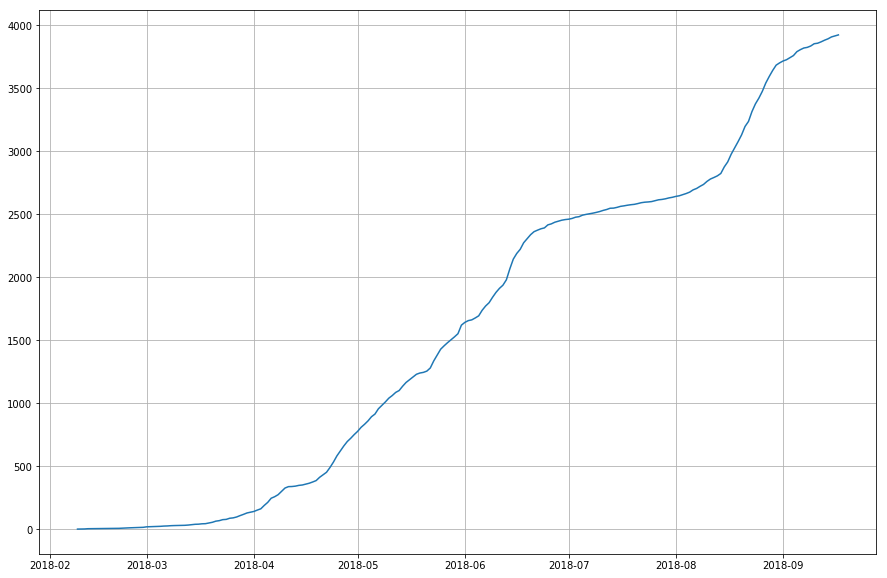

In [613]:
df['REGISTERED DATE'] = pd.to_datetime(df['REGISTERED DATE']).dt.date
progress = pd.DataFrame(df[['CANDIDATEID','REGISTERED DATE']].drop_duplicates('CANDIDATEID')['REGISTERED DATE'].value_counts()).sort_index()
progress = pd.DataFrame(progress['REGISTERED DATE'].cumsum())
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(progress)

### 1.1 Does state play any major role in dominating the moment of the curve ?¶

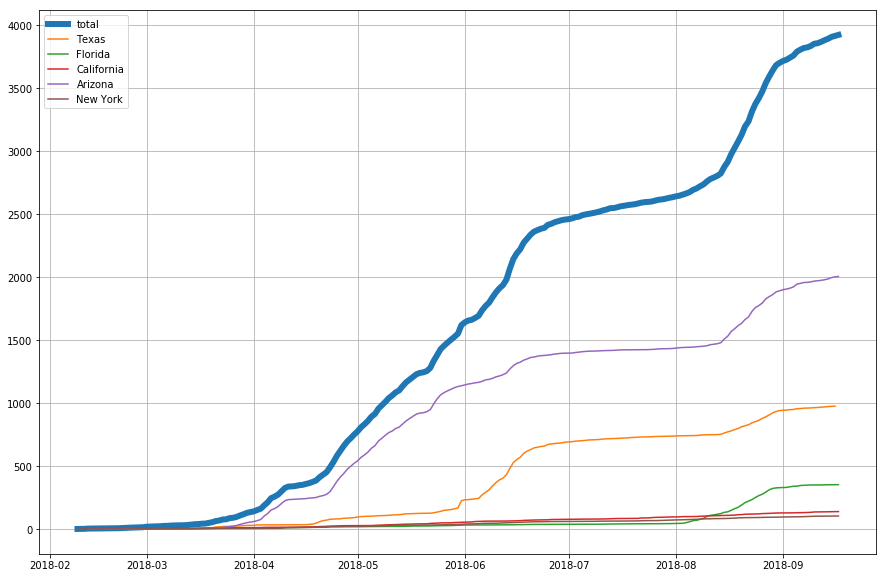

In [661]:
df['REGISTERED DATE'] = pd.to_datetime(df['REGISTERED DATE']).dt.date
progress = pd.DataFrame(df[['CANDIDATEID','REGISTERED DATE']].drop_duplicates('CANDIDATEID')['REGISTERED DATE'].value_counts()).sort_index()
progress = pd.DataFrame(progress['REGISTERED DATE'].cumsum())
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(progress, linewidth=6,label="total")
ls = ['Texas', 'Florida', 'California', 'Arizona', 'New York']
for i in ls:
    progress_texas = pd.DataFrame(df[df['STATE'] == i][['CANDIDATEID','REGISTERED DATE']].drop_duplicates('CANDIDATEID')['REGISTERED DATE'].value_counts()).sort_index()
    progress_texas = pd.DataFrame(progress_texas['REGISTERED DATE'].cumsum())
    
    plt.plot(progress_texas, label = i)
plt.legend()
plt.show()

## 2. Which is our main market, where we are performing well, where our most of the users based geographically, where is the product more popular?

As we can clearly see Adia is popular in Arizona 51% of users are Arizona based. Adia is also performing good in states like Texas, Florida, and California. Total users apart from these top 5 states are just 8% which shows we have huge opportunity to market our product in these states.


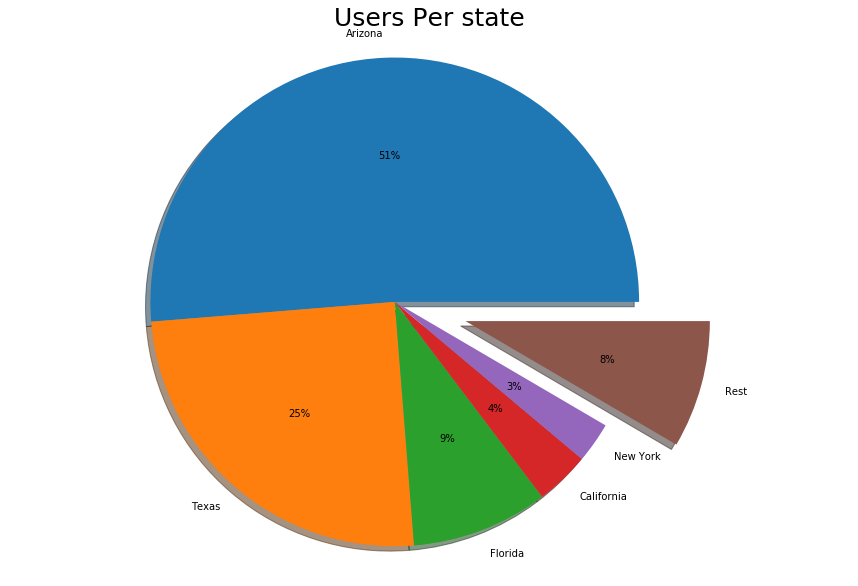

In [617]:
p_state =df[['CANDIDATEID','STATE']].groupby('CANDIDATEID').STATE.value_counts().keys().tolist()
x, y =np.unique(np.array(p_state)[:,1], return_counts = True)
state_chart =pd.DataFrame({'State':x,'Counts':y}).sort_values('Counts',ascending=False).reset_index(drop = True)
lst = [{'State':'Rest','Counts':state_chart[5:].sum().Counts}]
state_chart = state_chart[0:5].append(lst, ignore_index = True)
plt.figure(figsize=(15,10))
explode = (0, 0, 0, 0, 0, 0.3) 
plt.pie(state_chart.Counts, labels = state_chart.State, explode = explode, autopct='%1.0f%%',shadow=True)
plt.title('Users Per state',size=25)
plt.axis('equal')
plt.show()

### 3. We looked at the States, but the next question arises what about cities. Which cities have the largest user base of Adia?

Phoenix it is!! Phoenix is dominating all other cities. There is a good opportunity for the marketing team to study about Phoenix to figure out what factors really worked to be a great success and use such kind of strategy in other cities as well. Apart from these 10 cities, there are 546 more cities which have less than 1% user base.


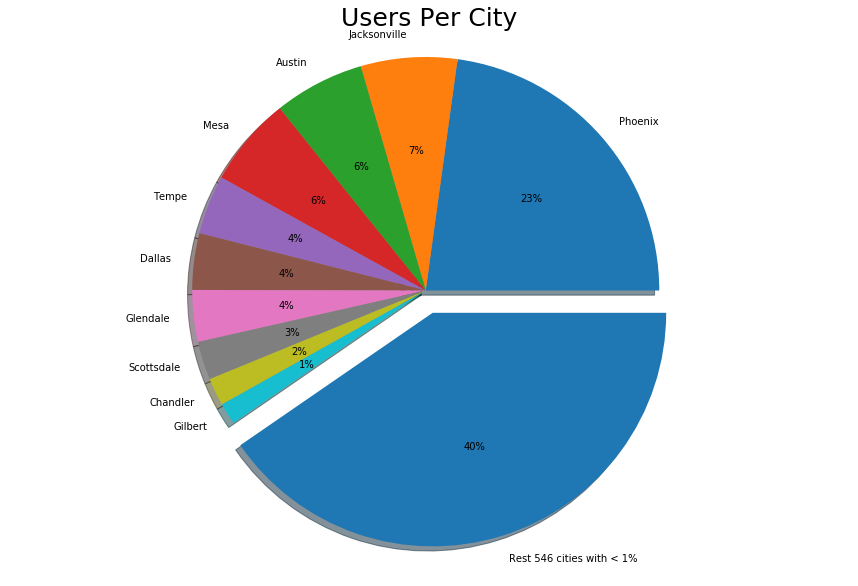

In [618]:
p_city =df[['CANDIDATEID','STATE', 'CITY']].groupby(['CANDIDATEID','STATE']).CITY.value_counts().keys().tolist()
x, y =np.unique(np.array(p_city)[:,2], return_counts = True)
city_chart =pd.DataFrame({'City':x,'Counts':y}).sort_values('Counts',ascending=False).reset_index(drop = True)
#p_city
#print(len(city_chart))
#np.unique(np.array(p_city)[:,1:], return_counts = True)

lst = [{'City':'Rest 546 cities with < 1%','Counts':city_chart[10:].sum().Counts}]
city_chart = city_chart[0:10].append(lst, ignore_index = True)
plt.figure(figsize=(15,10))
explode = (0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0.1) 
plt.pie(city_chart.Counts, labels = city_chart.City,explode =explode, autopct='%1.0f%%',shadow=True)
plt.title('Users Per City',size=25)
plt.axis('equal')
plt.show()

### 4. How can we grow faster or wider?
By having more jobs! how can we get more jobs? By attracting more employer! How can we attract more employers? Definitely by give giving them various options and talents! so it came down to get more workers to the platform? we can try to make our onboarding process more convenient, easier, faster! So, let's see what we can find about the onboarding process through data and see how we can make something useful out of it.
### 4.1 how many average steps one user have to take?
Assumption: I am assuming that all steps are not required based on the understanding of the data it seems like one can direct appear in the 4,3,2 step. Due to my limited understanding of the domain and how really everything actually works may affect the analysis!


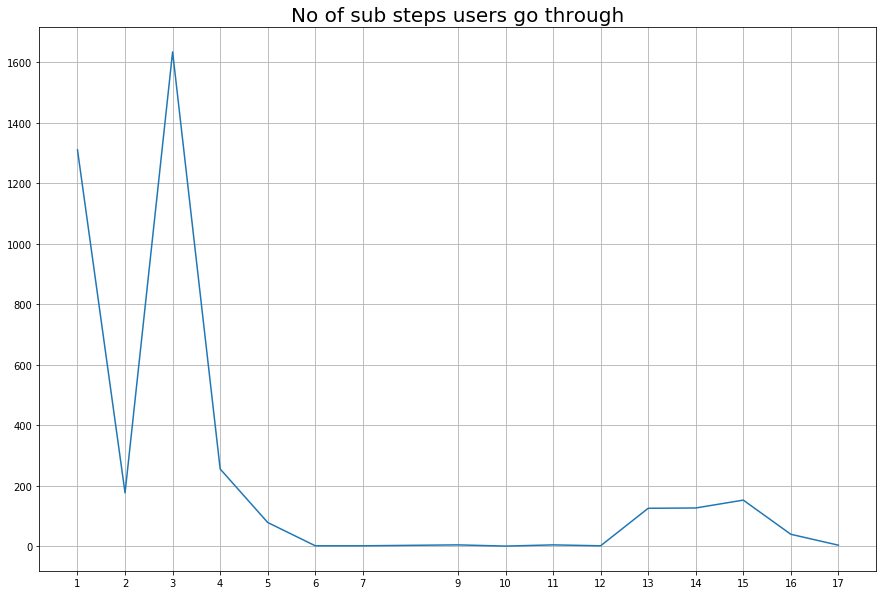

In [631]:
Cand_freq = np.array(df.CANDIDATEID.value_counts())
x,y = np.unique(Cand_freq, return_counts= True)
plt.figure(figsize=(15,10))
plt.grid()
plt.xticks(x)
plt.plot(x,y)
plt.title('No of sub steps users go through', size = 20)
plt.show()


#np.arr

There is a huge rise in the number of users we have gone through at least 3 steps and then people who went through more than 13 steps. The peak at 3 also includes the user who is still under process. With the appropriate domain knowledge, we can make a conclusion about the rise. 
### 4.2 How much time each step takes?
Step 0 has none values in it. and step 4 is the interview which is mainly between employer and worker so, for now, we will keep our analysis between 1 to 3 steps and try to find how we can reduce the time.


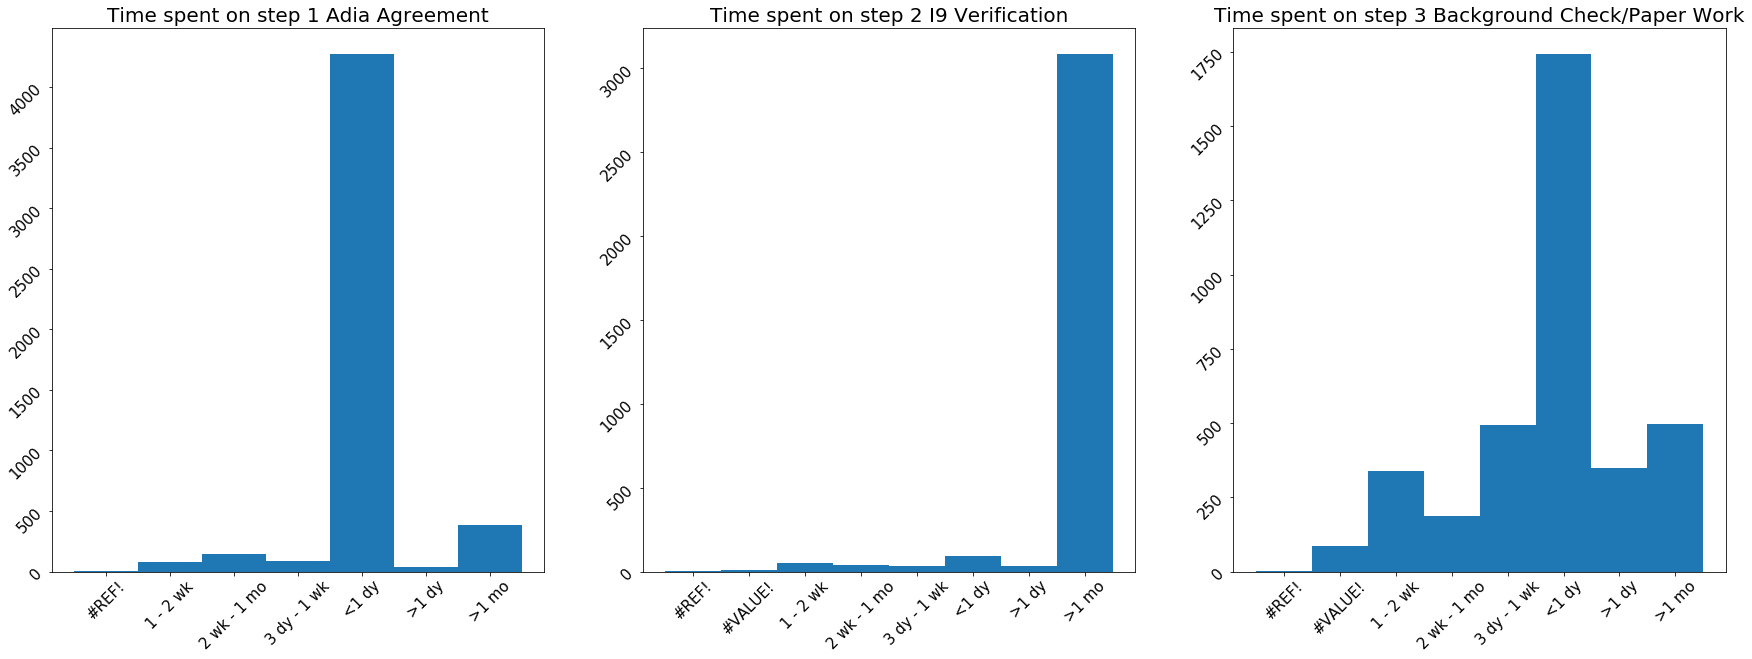

In [636]:
grouped_sq_time = pd.DataFrame(df.groupby(['Step Sequence','Main Step Latency Bucket' ]).size().reset_index())
titl = ['Adia Agreement','I9 Verification', 'Background Check/Paper Work']
f, axs = plt.subplots(1, 3)
f.set_figheight(10)
f.set_figwidth(30)
ax0, ax1, ax2 = axs.flatten()
for i in range(3):
    temp = grouped_sq_time[grouped_sq_time['Step Sequence'] == i+1][['Main Step Latency Bucket',0]]
    x = list(range(len(temp)))
    y = temp[0].values
    v = [ax0, ax1, ax2, ax3]
    v[i].bar(x,y,width=1)
    labels = ['p']
    labels = labels +list(temp['Main Step Latency Bucket'].values)
    v[i].set_title('Time spent on step {} {}'.format(i+1,titl[i]),size=20)
    #print(labels)
    plt.setp(v[i],xticklabels=labels)
    v[i].tick_params(labelrotation=45,labelsize=15)
plt.show()

Usually, step 1 takes less than 1 day. Here we should focus on users taking more than a day and try to do bring the time down to 1 day we can also see there are users taking more than a month which is unusual for the process which can be done in 1 day. Maybe these are the user who left just after registering. we can contact them and try to figure out the problem and help them to assist with the process.

Step 2: Verification!! It's the most time-consuming step so far. Verification can take time, but we should focus on the ways to reduce the time as much as possible.

Same goes for step 3 as well. A fast and effortless process can increase user satisfaction.


## 5) Conclusion

A detailed study of the approach taken in states like Arizona, Texas and cities like Phoenix can unlock various insights about users response towards Adia actions. We can use a similar approach in different cities and states to increase our user base.

Optimizing the onboarding process by reducing the usual time required to complete the process can directly influence user satisfaction. 

This is just a 1000 feet overview of the data. We can go to a very granular level to study the behavior of each user. we can find the similarity between the user and provide an accurate estimate of time to complete each step or complete the final step to the new user based on the previous similar users.

We can cluster users using Machine Learning algorithms based on how actively they are searching for work using their activities.

We can create a recommendation system for employer and employee using their previous job's data.

# Thank you Adia!